In [1]:
## Run this cell if packages are not installed yet
# using Pkg
# Pkg.add("Random")
# Pkg.add("Statistics")
# Pkg.add("StatsBase")
# Pkg.add("CSV")
# Pkg.add("DataFrames")
# Pkg.add("Plots")
# Pkg.add("StatsPlots")

In [2]:
using Random
using Statistics
using StatsBase
using CSV
using DataFrames
using Plots
using StatsPlots

# Read in Data

In [3]:
hormone_data = CSV.read("hormone_data.csv");

In [4]:
names(hormone_data)

3-element Array{Symbol,1}:
 :lot   
 :hrs   
 :amount

In [5]:
size(hormone_data)

(27, 3)

In [6]:
first(hormone_data,5)

,lot,hrs,amount
,String,Int64,Float64
1,A,99,25.8
2,A,152,20.5
3,A,293,14.3
4,A,155,23.2
5,A,196,20.6


In [7]:
last(hormone_data,5)

,lot,hrs,amount
,String,Int64,Float64
1,C,58,32.8
2,C,49,32.5
3,C,150,25.4
4,C,107,31.7
5,C,125,28.5


In [8]:
describe(hormone_data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,lot,,A,,C,3,,String
2,hrs,165.0,29,151.0,402,,,Int64
3,amount,24.6926,11.6,25.8,32.8,,,Float64


In [9]:
hormone_data[hormone_data.lot .== "A", :]

,lot,hrs,amount
,String,Int64,Float64
1,A,99,25.8
2,A,152,20.5
3,A,293,14.3
4,A,155,23.2
5,A,196,20.6
6,A,53,31.1
7,A,184,20.9
8,A,171,20.9
9,A,52,30.4


In [10]:
for lot in unique(hormone_data.lot)
    println("lot ",lot," mean")
    println(describe(hormone_data[hormone_data.lot .== lot, :], :mean))
    println()
end

lot A mean
3×2 DataFrame
│ Row │ variable │ mean    │
│     │ Symbol   │ Union…  │
├─────┼──────────┼─────────┤
│ 1   │ lot      │         │
│ 2   │ hrs      │ 150.556 │
│ 3   │ amount   │ 23.0778 │

lot B mean
3×2 DataFrame
│ Row │ variable │ mean    │
│     │ Symbol   │ Union…  │
├─────┼──────────┼─────────┤
│ 1   │ lot      │         │
│ 2   │ hrs      │ 233.444 │
│ 3   │ amount   │ 22.0778 │

lot C mean
3×2 DataFrame
│ Row │ variable │ mean    │
│     │ Symbol   │ Union…  │
├─────┼──────────┼─────────┤
│ 1   │ lot      │         │
│ 2   │ hrs      │ 111.0   │
│ 3   │ amount   │ 28.9222 │



# Plot Data

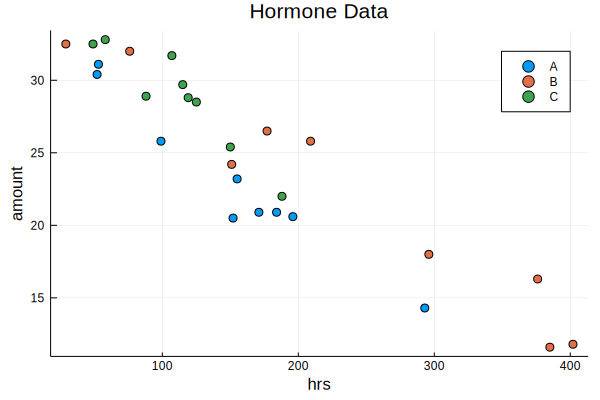

In [11]:
@df hormone_data scatter(:hrs, :amount, group=:lot, title="Hormone Data", xlabel="hrs", ylabel="amount")

# Least-Squares Regression

In [12]:
function convert_z_to_c(z)
    # create c_i = (1, z_i) matrix
    c = ones((size(z)[1],2 ))
    c[:, 2] = z # NOTE: indexing starts at ** 1 ** not 0
    return c
end

function find_beta_linalg(z, y)
    c = convert_z_to_c(z)
    CtC = c' * c
    beta = inv(CtC) * c' * y
    return beta
end

find_beta_linalg (generic function with 1 method)

In [13]:
for lot in unique(hormone_data.lot)
    lot_data = hormone_data[hormone_data.lot .== lot, :]
    println("regression fit for lot ",lot)
    println(find_beta_linalg(lot_data.hrs, lot_data.amount))
    println()
end

regression fit for lot A
[33.360055310271214, -0.06829557032652461]

regression fit for lot B
[35.2298249505469, -0.05633908831743079]

regression fit for lot C
[37.19367089550014, -0.07451755561511669]



In [14]:
println("regression fit for all data")
beta = find_beta_linalg(hormone_data.hrs, hormone_data.amount)
println(beta)

regression fit for all data
[34.17204585413626, -0.05745123188814342]


# Standard Error

In [15]:
function RSE(z, y, b)
    c = convert_z_to_c(z)
    SSE = 0
    for (i, yi) in enumerate(y)
        SSE += (yi - transpose(c[i,:])*b)^2
    end
    return SSE
end

function find_Ginv(z)
    c = convert_z_to_c(z)
    G = c' * c
    Ginv = inv(G)
    return Ginv
end

function find_se_hat(z, y, beta)
    s_f_hat = (RSE(z, y, beta)/size(y)[1])^0.5
    Ginv = find_Ginv(z)
    se_b0 = s_f_hat*sqrt(Ginv[1,1])
    se_b1 = s_f_hat*sqrt(Ginv[2,2])
    return se_b0, se_b1
end

function find_se_bar(z, y, beta)
    c = convert_z_to_c(z)
    s_f_bar = (RSE(z, y, beta)/(size(y)[1]-size(c)[2]))^0.5
    Ginv = find_Ginv(z)
    se_b0 = s_f_bar*sqrt(Ginv[1,1])
    se_b1 = s_f_bar*sqrt(Ginv[2,2])
    return se_b0, se_b1
end

find_se_bar (generic function with 1 method)

In [16]:
seh_b0, seh_b1 = find_se_hat(hormone_data.hrs, hormone_data.amount, beta)
seb_b0, seb_b1 = find_se_bar(hormone_data.hrs, hormone_data.amount, beta)

println("b0_h = ",beta[1])
println("b1_h = ", beta[2])
println("seh_b0 = ", seh_b0)
println("seb_b0 = ", seb_b0)
println("seh_b1 = ", seh_b1)
println("seb_b1 = ", seb_b1)

b0_h = 34.17204585413626
b1_h = -0.05745123188814342
seh_b0 = 0.8336667719106025
seb_b0 = 0.8663719233186586
seh_b1 = 0.004291564319310135
seb_b1 = 0.004459924466996939


# Bootstrap the residuals

In [19]:
function get_errors(z, y, beta)
    c = convert_z_to_c(z)
    e = y - c*beta
    return e
end

function bootstrap_errors_to_y_star(z, beta, e)
    c = convert_z_to_c(z)
    e_star = sample(e, size(e)[1], replace=true)
    y_star = c*beta + e_star
    return e_star, y_star
end

bootstrap_errors_to_y_star (generic function with 1 method)

In [20]:
y = hormone_data.amount
z = hormone_data.hrs
e = get_errors(z, y, beta)

e_star, y_star = bootstrap_errors_to_y_star(z, beta, e)
beta_star = find_beta_linalg(z, y_star)

seh_b0,seh_b1 = find_se_hat(z, y_star, beta_star)
seb_b0,seb_b1 = find_se_bar(z, y_star, beta_star)

println("b0_h = ",beta_star[1])
println("b1_h = ",beta_star[2])
println("seh_b0 = ",seh_b0)
println("seb_b0 = ",seb_b0)
println("seh_b1 = ",seh_b1)
println("seb_b1 = ",seb_b1)

b0_h = 34.60518982247443
b1_h = -0.055596290731678724
seh_b0 = 0.8416333464928419
seb_b0 = 0.8746510304818943
seh_b1 = 0.004332574790611405
seb_b1 = 0.004502543798958627
